In [49]:
import csv
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd


data = pd.read_csv('merge.csv')
data

,Unnamed: 0,Ticker,Year,Highest,Lowest,Open,Close,Yearly Return (%),Yearly Moving (%),Name,Identifier,SEDOL,Weight,Sector,Shares Held,Local Currency
0,0,AAPL,2013,20.540714,13.753571,19.779285,20.036428,1.300062,49.348231,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
1,1,AAPL,2014,29.937500,17.626785,19.845715,27.594999,39.047648,69.840952,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
2,2,AAPL,2015,33.634998,23.000000,27.847500,26.315001,-5.503185,46.239123,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
3,3,AAPL,2016,29.672501,22.367500,25.652500,28.955000,12.873988,32.658993,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
4,4,AAPL,2017,44.299999,28.690001,28.950001,42.307499,46.139889,54.409196,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4888,4888,DISH,2018,50.490002,23.219999,48.410000,24.969999,-48.419749,117.441874,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD
4889,4889,DISH,2019,44.660000,24.250000,24.350000,35.470001,45.667354,84.164948,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD
4890,4890,DISH,2020,42.619999,17.090000,35.869999,32.340000,-9.841090,149.385597,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD
4891,4891,DISH,2021,47.049999,28.530001,32.430000,32.439999,0.030830,64.914119,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD


In [70]:
data['Weighted Yearly Change'] = data['Yearly Return (%)']*data['Weight']


total_change = data.groupby('Ticker')['Yearly Return (%)'].sum()
change_data = pd.DataFrame()

change_data['Ticker'] = total_change.index
change_data['Yearly Return (%)'] = total_change.values
change_data

,Ticker,Yearly Return (%)
0,A,188.782231
1,AAL,89.133264
2,AAP,129.982310
3,AAPL,261.366567
4,ABBV,186.778894
...,...,...
496,YUM,110.037738
497,ZBH,86.978536
498,ZBRA,277.441220
499,ZION,120.084396


In [68]:
first_row = data.groupby('Ticker').nth(0)
first_data = pd.DataFrame()
first_data[['Weight', 'Sector']] = first_row[['Weight', 'Sector']]
first_data.reset_index()
first_data['Ticker'] = first_row.index
first_data = first_data.reset_index(drop=True)


In [52]:
all_data = first_data.merge(change_data, on='Ticker')
all_data

,Weight,Sector,Ticker,Yearly Return (%)
0,0.118341,Health Care,A,188.782231
1,0.025061,Industrials,AAL,89.133264
2,0.022092,Consumer Discretionary,AAP,129.982310
3,7.110275,Information Technology,AAPL,261.366567
4,0.839079,Health Care,ABBV,186.778894
...,...,...,...,...
496,0.112934,Consumer Discretionary,YUM,110.037738
497,0.083689,Health Care,ZBH,86.978536
498,0.042926,Information Technology,ZBRA,277.441220
499,0.012260,Financials,ZION,120.084396


In [53]:
avg_change = all_data.groupby('Sector')['Yearly Return (%)'].mean()
avg_change

Sector
Communication Services    144.094889
Consumer Discretionary    164.391532
Consumer Staples          106.102554
Energy                    108.855446
Financials                140.143458
Health Care               186.191594
Industrials               156.012124
Information Technology    248.724231
Materials                 108.769311
Real Estate                73.185951
Utilities                  85.481979
Name: Yearly Return (%), dtype: float64

In [54]:
ten_year_data = pd.DataFrame()

ten_year_data['Sector'] = avg_change.index
ten_year_data['10 Year Change'] = avg_change.values
ten_year_data['Yearly Change'] = avg_change.values/10
ten_year_data

,Sector,10 Year Change,Yearly Change
0,Communication Services,144.094889,14.409489
1,Consumer Discretionary,164.391532,16.439153
2,Consumer Staples,106.102554,10.610255
3,Energy,108.855446,10.885545
4,Financials,140.143458,14.014346
5,Health Care,186.191594,18.619159
6,Industrials,156.012124,15.601212
7,Information Technology,248.724231,24.872423
8,Materials,108.769311,10.876931
9,Real Estate,73.185951,7.318595


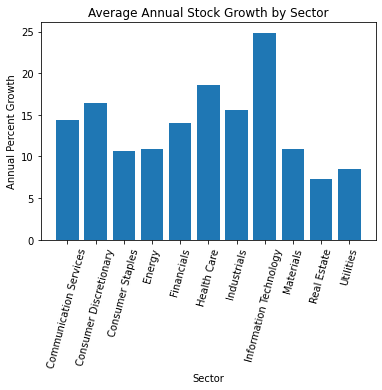

In [61]:
ticks = ten_year_data['Sector']
plt.bar(ten_year_data['Sector'], ten_year_data['Yearly Change'])
plt.xticks(ten_year_data['Sector'], ticks, rotation=75)
plt.xlabel('Sector')
plt.ylabel('Annual Percent Growth')
plt.title('Average Annual Stock Growth by Sector')
plt.show()

In [74]:
weight_df = data.groupby('Sector')['Weighted Yearly Change'].mean()
weight_df

Sector
Communication Services     7.129211
Consumer Discretionary     6.232274
Consumer Staples           2.180631
Energy                     1.984219
Financials                 2.499381
Health Care                4.384357
Industrials                1.835023
Information Technology    11.279486
Materials                  1.130160
Real Estate                0.809093
Utilities                  0.939226
Name: Weighted Yearly Change, dtype: float64